# Types Of Transformations

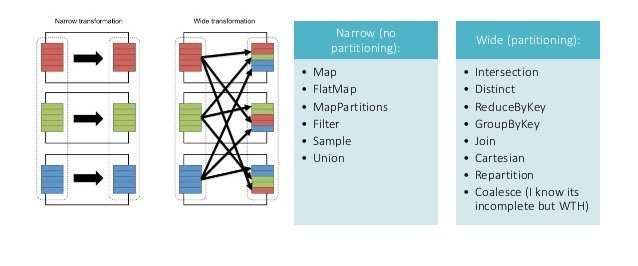

In [1]:
from IPython.display import Image
Image(filename="transformation.jpg")

# Narrow Transformations

In [2]:
from pyspark import SparkContext

In [3]:
sc = SparkContext()

In [4]:
num = sc.parallelize([1,2,3,4])

In [5]:
num.map(lambda x:x*2).collect()

[2, 4, 6, 8]

In [6]:
num.map(lambda x:pow(x,2)).collect()

[1, 4, 9, 16]

In [7]:
name = sc.parallelize(['Rohan','Rohit'])

In [8]:
name.map(lambda x: "Mr. "+x).collect()

['Mr. Rohan', 'Mr. Rohit']

In [9]:
a = range(1,3)
for i in a:
    print(i)

1
2


In [10]:
num.flatMap(lambda x:range(1,x)).collect()

[1, 1, 2, 1, 2, 3]

In [11]:
num.flatMap(lambda x:(x,x+10,57)).collect()

[1, 11, 57, 2, 12, 57, 3, 13, 57, 4, 14, 57]

In [12]:
num.filter(lambda x:x%2==0).collect()

[2, 4]

In [13]:
name.filter(lambda x:'a' in x).collect()

['Rohan']

In [14]:
name.union(num).collect()

['Rohan', 'Rohit', 1, 2, 3, 4]

In [15]:
num.sample(True,.5).collect()
#values wont repeat if TRUE

[1, 3, 3]

In [16]:
num.sample(True,.5).collect()

[1]

In [17]:
num.sample(True,.5).collect()

[2, 2, 2]

In [18]:
num.sample(False,.5,seed=23).collect()

[1, 2, 3, 4]

# Wide Transformations

In [19]:
name_r = name.groupBy(lambda x:x[0]).collect()

In [20]:
for(k,v) in name_r:
    print(k,list(v))

R ['Rohan', 'Rohit']


In [21]:
num_r = num.groupBy(lambda x: x%2).collect()

In [22]:
for(k,v) in num_r:
    print(k,list(v))

0 [2, 4]
1 [1, 3]


In [23]:
num2 = sc.parallelize([2,3,4,5])

In [24]:
num.intersection(num2).collect()

[2, 3, 4]

In [25]:
num.subtract(num2).collect()

[1]

In [26]:
num2.subtract(num).collect()

[5]

In [27]:
num.distinct().collect()

[1, 2, 3, 4]

# Transformation on Key-Value Pairs
### Note: map() and reduce() are not used with KV pairs

In [28]:
data = sc.parallelize([(1,2),(1,4),(2,4),(3,1),(2,1),(3,2)])

In [29]:
data.collect()

[(1, 2), (1, 4), (2, 4), (3, 1), (2, 1), (3, 2)]

In [30]:
type(data)

pyspark.rdd.RDD

In [31]:
data.count()

6

In [32]:
data.countByValue()

defaultdict(int,
            {(1, 2): 1, (1, 4): 1, (2, 4): 1, (3, 1): 1, (2, 1): 1, (3, 2): 1})

In [34]:
data.top(2)

[(3, 2), (3, 1)]

In [36]:
data.sortByKey().collect()

[(1, 2), (1, 4), (2, 4), (2, 1), (3, 1), (3, 2)]

In [37]:
data.lookup(3)

[1, 2]

In [40]:
data.sortByKey().keys().collect()

[1, 1, 2, 2, 3, 3]

In [39]:
data.values().collect()

[2, 4, 4, 1, 1, 2]

In [41]:
data.mapValues(lambda x: x+x).collect()

[(1, 4), (1, 8), (2, 8), (3, 2), (2, 2), (3, 4)]

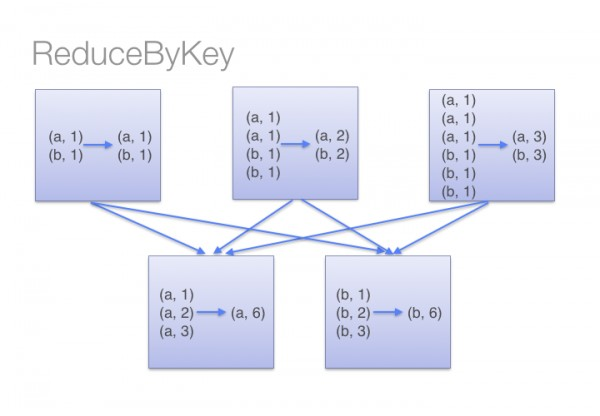

In [42]:
Image(filename='reducebykey.png')

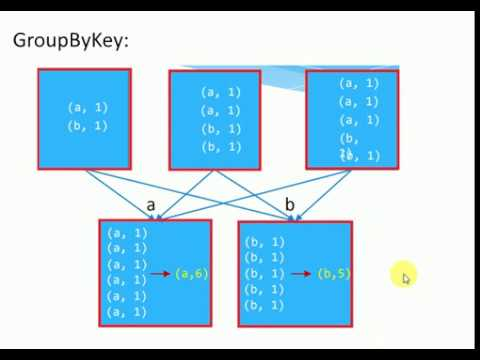

In [43]:
Image(filename='groupbykey.jpg')

In [46]:
data.reduceByKey(lambda x,y: x+y).collect()

[(1, 6), (2, 5), (3, 3)]

In [49]:
data.reduceByKey(max).collect()

[(1, 4), (2, 4), (3, 2)]

In [52]:
result = data.groupByKey().collect()

In [53]:
for (k,v) in result:
    print(k,list(v))

1 [2, 4]
2 [4, 1]
3 [1, 2]


In [57]:
#reduceByKey() = groupByKey().mapValues()
data.groupByKey().mapValues(sum).collect()

[(1, 6), (2, 5), (3, 3)]

In [58]:
data.groupByKey().mapValues(max).collect()

[(1, 4), (2, 4), (3, 2)]

In [60]:
data.flatMapValues(lambda x:range(1,x)).collect()

[(1, 1), (1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1)]

In [66]:
data2 = sc.parallelize([(1,2),(4,6)])

In [65]:
data.collect()

[(1, 2), (1, 4), (2, 4), (3, 1), (2, 1), (3, 2)]

In [68]:
data.subtractByKey(data2).collect()

[(2, 4), (2, 1), (3, 1), (3, 2)]

In [67]:
data2.subtractByKey(data).collect()

[(4, 6)]

In [70]:
data.join(data2).collect()

[(1, (2, 2)), (1, (4, 2))]

In [71]:
data2.join(data).collect()

[(1, (2, 2)), (1, (2, 4))]

In [72]:
data.rightOuterJoin(data2).collect()

[(1, (2, 2)), (1, (4, 2)), (4, (None, 6))]

In [73]:
data.leftOuterJoin(data2).collect()

[(1, (2, 2)),
 (1, (4, 2)),
 (2, (4, None)),
 (2, (1, None)),
 (3, (1, None)),
 (3, (2, None))]

In [74]:
sc.stop()